#e-Numpy (Kelompok 6)
- Ilham Taufiqurrohim
- Muhammad Chosasih Mahendra
- Putri Maylita
- Rama Putra
- Samuel Akwila


# DATA PRE-PROCESSING

## Data Cleansing

In [ ]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,12
pd.set_option('display.max_columns',None)

In [ ]:
#Baca dataset

df = pd.read_csv('Employee_Attrition.csv',sep=',')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Memisahkan kolom numeric dan categorical

numeric = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
           'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
           'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 
           'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
           
categorical = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
               'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction',
               'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating',
               'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

### Handle Missing and Duplicated Value

In [ ]:
duplicate = df.duplicated().sum()
missing = df.isnull().sum()
print(f'Jumlah duplicated value:    {duplicate}')
print(f'Jumlah missing value:\n{missing}')

Jumlah duplicated value:    0
Jumlah missing value:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany    

**Pengamatan:**

Data tidak memiliki nilai yang duplikat dan seluruh kolom dalam data tidak memiliki nilai kosong.

### Handle Irrelevant Columns

**Pengamatan:**

Berdasarkan EDA di Stage 1, terdapat beberapa kolom yang tidak memiliki relevansi terhadap variabel target karena hanya memiliki satu unique value **`(EmployeeCount, StandardHours, dan Over18)`** dan merupakan informasi ID pegawai **(EmployeeNumber)**. Oleh karena itu, drop kolom-kolom tersebut.

In [ ]:
#Melihat summary data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Melihat summary data
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
df = df.drop(columns=['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Handle Outliers

**Perubahan:**

Setelah dilakukan modeling, data yang outliernya dihapus ternyata menghasilkan model yang hasilnya kurang baik / tidak robust, sehingga tidak perlu dilakukan penghapusan outliers.

In [ ]:
#Melihat ukuran data sebelum penghapusan outliers
df.shape

(1470, 35)

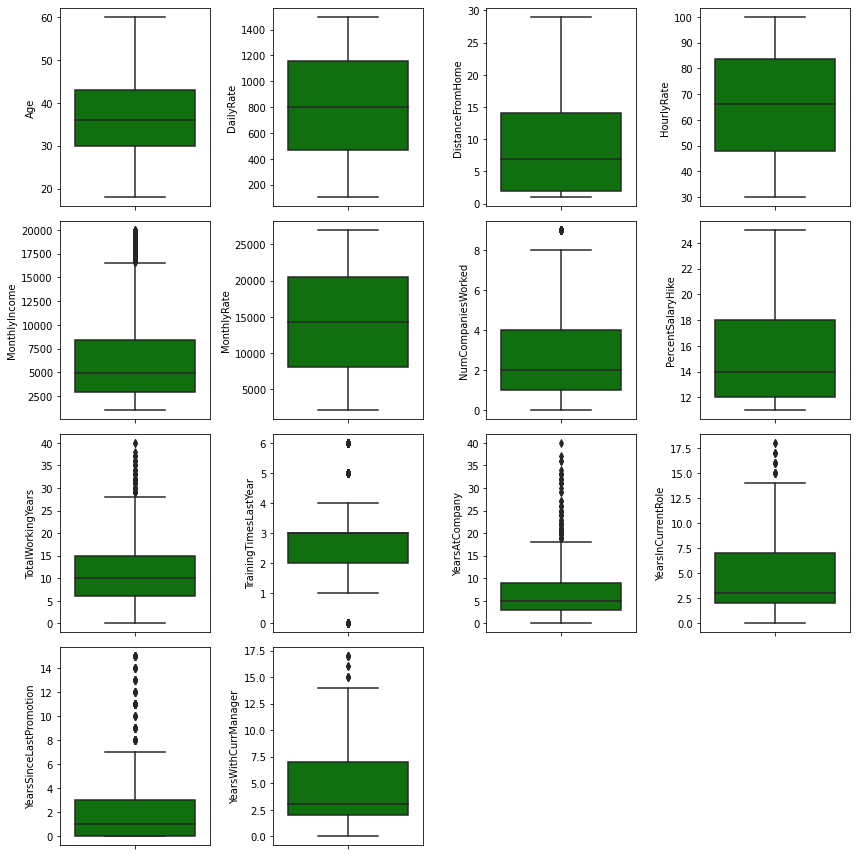

In [ ]:
for i in range(0, len(numeric)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[numeric[i]], color='green', orient='v')
    plt.tight_layout()

In [ ]:
#Penghapusan outliers menggunakan metode z score
df_outlier_clean = df.copy()
# df_outlier_negasi = df.copy()

import scipy.stats as st

outliers = ['MonthlyIncome','YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion']
for i in outliers:
  z_scores = np.abs(st.zscore(df_outlier_clean[i]))
  # z_scores2 = np.abs(st.zscore(df_outlier_negasi[i]))
  filtered_entries = (z_scores < 1.5)
  # filtered_entries_negasi = (z_scores2 >= 1.5)
  df_outlier_clean = df_outlier_clean[filtered_entries]
  # df_outlier_negasi = df_outlier_negasi[filtered_entries_negasi]


df_outlier_clean.shape

(961, 31)

In [ ]:
# df[~df['EmployeeNumber'].isin(df_outlier_clean['EmployeeNumber'].values)]['Attrition'].value_counts()

No     449
Yes     60
Name: Attrition, dtype: int64

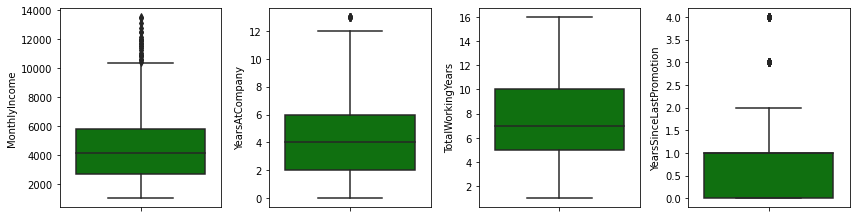

In [ ]:
#Check ulang distribusi data menggunakan boxplot

for i in range(0, len(outliers)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_outlier_clean[outliers[i]], color='green', orient='v')
    plt.tight_layout()

In [ ]:
df_outlier_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Feature Engineering

#### Feature Encoding

In [ ]:
#Label encoding
df_label = df_outlier_clean.copy()

df_label.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
label_encoding = {"Attrition": {'No':0, "Yes": 1},
                  "OverTime":{'No':0, "Yes": 1},
                  "Gender":{'Male':0, "Female":1},
                  "BusinessTravel":{"Non-Travel":0,"Travel_Rarely":1,"Travel_Frequently":2}
                  }

df_label[['Attrition', 'OverTime',"Gender","BusinessTravel"]]=df_label[['Attrition', 'OverTime',"Gender","BusinessTravel"]].replace(label_encoding)
df_label[['Attrition', 'OverTime',"Gender","BusinessTravel"]].head()

,Attrition,OverTime,Gender,BusinessTravel
0,1,1,1,1
1,0,0,0,2
2,1,1,0,1
3,0,1,1,2
4,0,0,0,1


In [ ]:
#One Hot Encoding

for i in ['MaritalStatus', 'EducationField', 'JobRole','Department']:
    onehots = pd.get_dummies(df_label[i], prefix=i)
    df_label = df_label.join(onehots)
    
df_label = df_label.drop(columns=['MaritalStatus', 'Department', 'EducationField', 'JobRole'], axis =1)
df_label.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1,1102,1,2,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,33,0,2,1392,3,4,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


**Perubahan:**

Merubah seluruh fitur categorical menggunakan one hot encoding, dan hanya menggunakan label encoding untuk variabel target/Attrition.

#### Feature Selection

In [ ]:
# function untuk menghapus kolom yang tidak memiliki korelasti dengan target
def CorrTarget(df, target, treshold):
    low_correlation = df.corr()
    selection = low_correlation[round(abs(low_correlation[target]),2) >= treshold]
    index_values = selection.index.values
    correlation_1 = selection[index_values]
    return correlation_1, index_values

In [ ]:
def cekRedundan(df, treshold):
    df_loop = df.copy()
    redundan = [
                [],[],[]
                ]    
    
    for index, row in df_loop.iterrows():
        # print(df_loop.loc[index,'Age'])
        for i in row.index.values:
            if (len(redundan[0]) == 0) | ((index+' - '+i not in redundan[2]) & (i+' - '+index not in redundan[2])) :
                nilai = df_loop.loc[index,i]
                if (abs(nilai) >= treshold) & (nilai != 1.0) :
                    redundan[0].append(index)
                    redundan[1].append(i)
                    redundan[2].append(index + ' - ' + i)
                    
    for i in redundan[2]:
        print(i)

In [ ]:
df_label.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1,1102,1,2,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,33,0,2,1392,3,4,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_corr_target, kolom_corr_target = CorrTarget(df_label, 'Attrition', 0.1)
df_corr_target.shape
kolom_corr_target

array(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Manufacturing Director',
       'JobRole_Sales Representative'], dtype=object)

In [ ]:
df_select = df_label.copy()

# ambil kolom yang punya korelasi tinggi ke target
df_select = df_select[kolom_corr_target]

# # Drop fitur yang redundan
# # df_select = df_select.drop(['JobLevel','TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis = 1)
# df_select = df_select.drop(['JobLevel','YearsInCurrentRole', 'YearsWithCurrManager'], axis = 1)
# df_select

In [ ]:
cekRedundan(df_select.corr(),0.6)


JobLevel - MonthlyIncome
StockOptionLevel - MaritalStatus_Single
YearsAtCompany - YearsInCurrentRole
YearsAtCompany - YearsWithCurrManager
YearsInCurrentRole - YearsWithCurrManager
MaritalStatus_Married - MaritalStatus_Single


In [ ]:
#Delete redundan features

df_select = df_select.drop(['JobLevel', 'YearsInCurrentRole', 
                          'YearsWithCurrManager'], axis = 1)

# df_select = df_select.drop(['JobLevel', 'YearsInCurrentRole', 
#                           'YearsWithCurrManager','MaritalStatus_Single'], axis = 1)
df_select


,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,MaritalStatus_Married,MaritalStatus_Single,JobRole_Manufacturing Director,JobRole_Sales Representative
0,41,1,1,1,2,3,4,5993,1,0,8,6,0,1,0,0
1,49,0,2,8,3,2,2,5130,0,1,10,10,1,0,0,0
2,37,1,1,2,4,2,3,2090,1,0,7,0,0,1,0,0
3,33,0,2,3,4,3,3,2909,1,0,8,8,1,0,0,0
4,27,0,1,2,1,3,2,3468,0,1,6,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0,0,5,2,3,1,9936,0,0,10,9,0,1,1,0
1464,26,0,1,5,4,2,3,2966,0,0,5,4,0,1,0,1
1466,39,0,1,6,4,2,1,9991,0,1,9,7,1,0,0,0
1467,27,0,1,4,2,4,2,6142,1,1,6,6,1,0,1,0


In [ ]:
df_select.shape

(961, 16)

In [ ]:
cekRedundan(df_select.corr(),0.7)


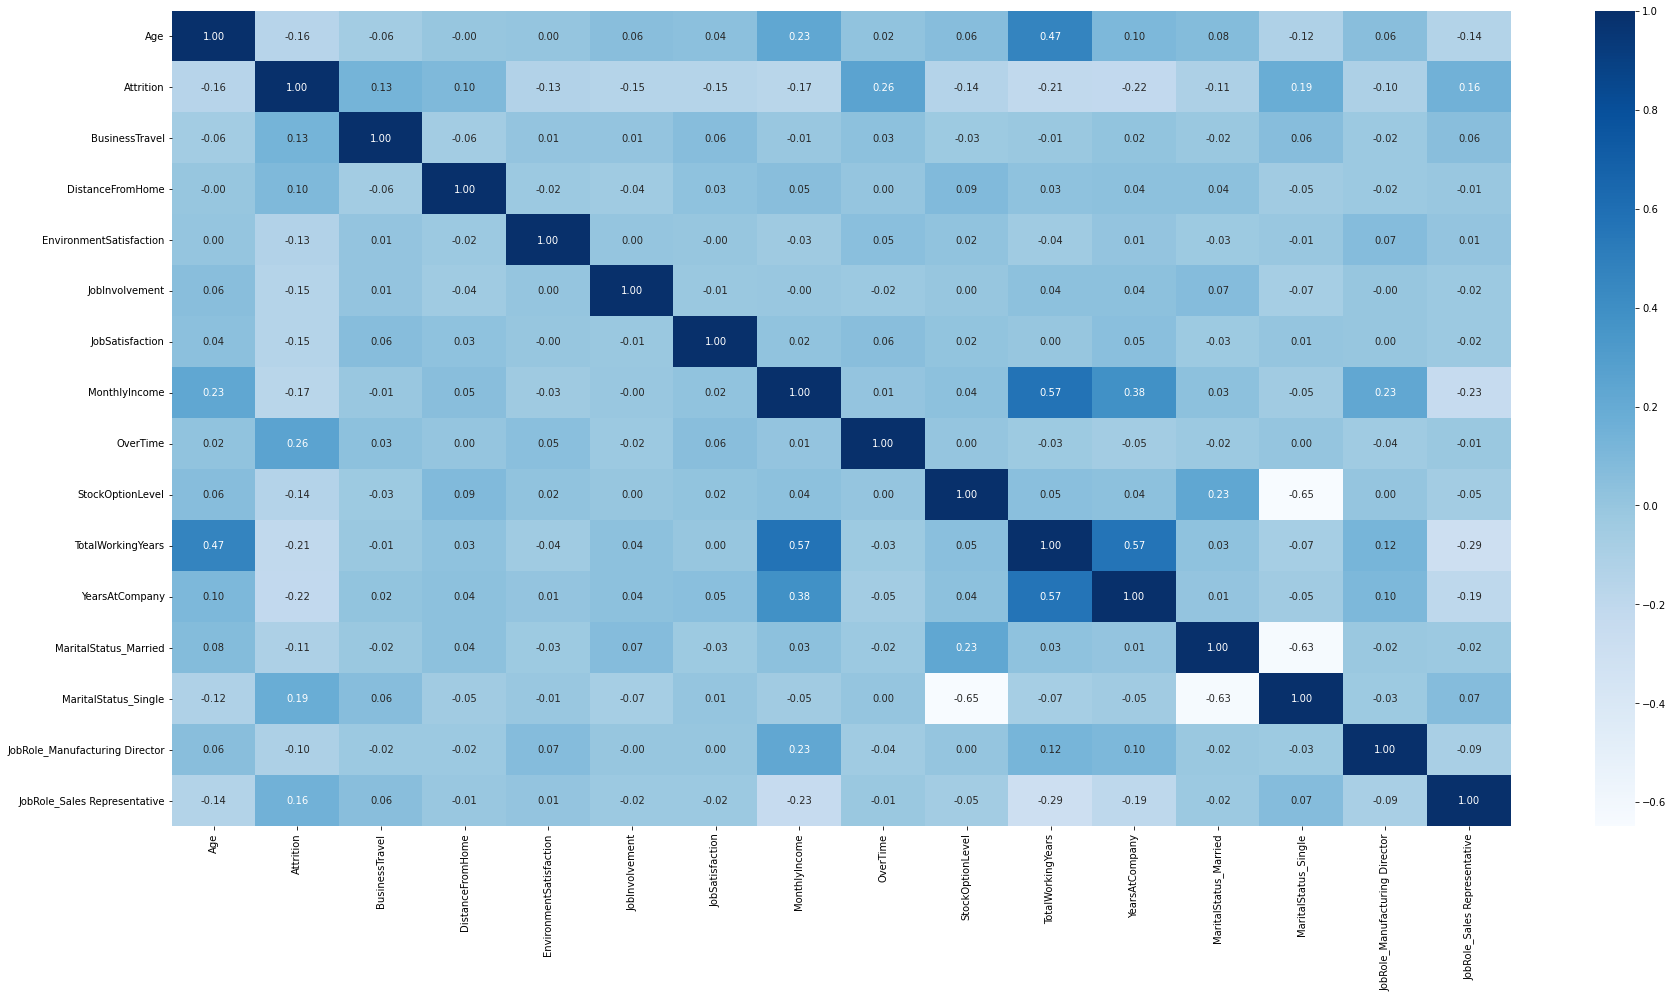

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df_select.corr(), cmap="Blues", annot=True, fmt='.2f')
plt.show()

**Perubahan:** 

Untuk memperbaiki hasil model yang kurang baik, feature selection hanya menghapus fitur yang redundan saja (korelasi >0.7) dan tetap mempertahankan fitur yang korelasinya rendah ke Attrition.

#### Feature Extraction

Pada dataset ini tidak diperlukan melakukan feature extraction karena fitur-fitur yang ada pada dataset ini sudah tidak dapat diekstraksi lebih lagi menjadi fitur baru

### Feature Transformation

#### Log Transform

**Pengamatan:**

Berdasarkan analisis di Stage 1, kolom yang sangat skew adalah:**` MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.`**

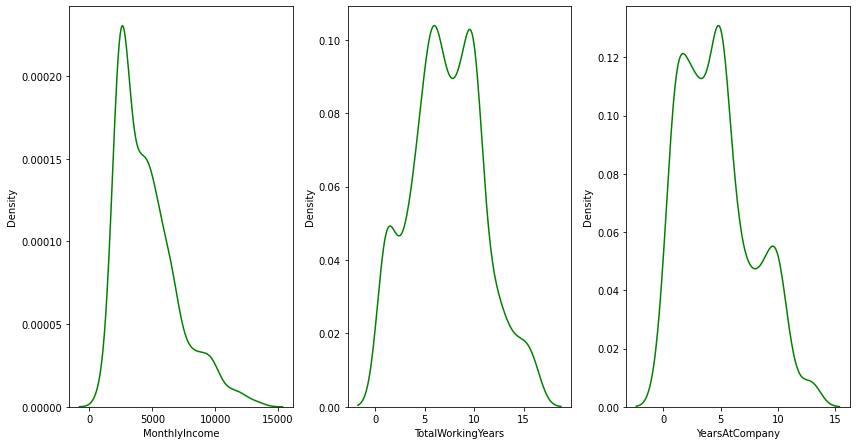

In [ ]:
# Mengelompokkan kolom yang perlu di transformasi
skew = ['MonthlyIncome', 'TotalWorkingYears',
        'YearsAtCompany']
        
# Visualisasi ulang untuk komparasi
for i in range(0, len(skew)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df_select[skew[i]], color='green')
    plt.xlabel(skew[i])
    plt.tight_layout()

In [ ]:
#Melakukan transformasi menggunakan metode log transform (x+1)
df_transform = df_select.copy()

df_transform.loc[:, skew] = np.log(df_transform[skew] + 1)
df_transform[skew].head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,8.698514,2.197225,1.945910
1,8.543056,2.397895,2.397895
2,7.645398,2.079442,0.000000
3,7.975908,2.197225,2.197225
4,8.151622,1.945910,1.098612


Melihat referensi dari [website](https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431), metode untuk transformasi kolom yang memiliki value 0 dan cukup kuat untuk menghandle skewness tinggi yaitu menggunakan log (x+1) transform, karena apabila hanya menggunakan log transform, kolom yang memiliki value 0 akan berubah menjadi -inf.

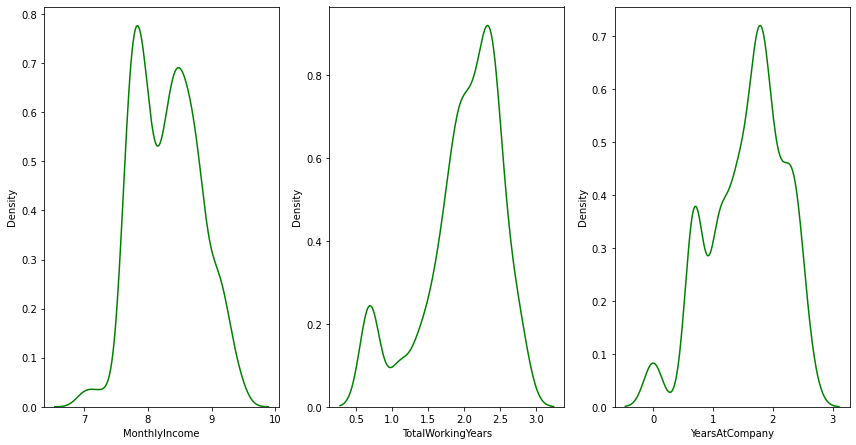

In [ ]:
#Distribusi data setelah dilakukan transformasi

for i in range(0, len(skew)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df_transform[skew[i]], color='green')
    plt.xlabel(skew[i])
    plt.tight_layout()

#### Normalisasi

In [ ]:
df_transform.shape

(961, 16)

In [ ]:
#Normalisasi numeric data menggunakan StandardScaler
df_standard = df_transform.copy()

standard = ['Age', 'DistanceFromHome',
           'TotalWorkingYears', 
            'MonthlyIncome', 'YearsAtCompany']
from sklearn.preprocessing import StandardScaler
df_standard[standard] = StandardScaler().fit_transform(df_standard[standard].values.reshape(len(df_standard),5))

In [ ]:
df_standard

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,MaritalStatus_Married,MaritalStatus_Single,JobRole_Manufacturing Director,JobRole_Sales Representative
0,0.845429,1,1,-1.032809,2,3,4,0.790948,1,0,0.385080,0.614250,0,1,0,0
1,1.836685,0,2,-0.145263,3,2,2,0.477796,0,1,0.752052,1.349772,1,0,0,0
2,0.349802,1,1,-0.906016,4,2,3,-1.330423,1,0,0.169686,-2.552358,0,1,0,0
3,-0.145826,0,2,-0.779224,4,3,3,-0.664651,1,0,0.385080,1.023218,1,0,0,0
4,-0.889268,0,1,-0.906016,1,3,2,-0.310699,0,1,-0.074507,-0.764570,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,-0.393640,0,0,-0.525640,2,3,1,1.809226,0,0,0.752052,1.194672,0,1,1,0
1464,-1.013174,0,1,-0.525640,4,2,3,-0.625576,0,0,-0.356407,0.066704,0,1,0,1
1466,0.597616,0,1,-0.398848,4,2,1,1.820345,0,1,0.577756,0.831548,1,0,0,0
1467,-0.889268,0,1,-0.652432,2,4,2,0.840409,1,1,-0.074507,0.614250,1,0,1,0


# MACHINE LEARNING

## Modeling

**Metric evaluasi machine learning akan berfokus pada skor Precision, karena fokus pada kedua label positif (Attrition Yes)**

### Import Library and Function

In [ ]:
#Machine learning model library

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

#Fungsi evaluasi
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def eval_classification_over(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over)
    print("Precision (Train Set): %.2f" % precision_score(y_over, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_over, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_over, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))


def eval_classification_smote(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_smote)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_smote)
    print("Precision (Train Set): %.2f" % precision_score(y_smote, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_smote, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_smote, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_smote, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

#Confusion plot
def fixConfusion(y_pred_train, y_train):
  v_array = confusion_matrix(y_pred_train, y_train)
  tes=v_array
  tes2=[[],[]]
  n=len(tes)-1
  for i in range(0,len(tes)):
    m=len(tes[i])-1
    for j in range(0, len(tes[i])):
      tes2[i].append(tes[n][m])     
      m-=1
    n-=1

  tes2=np.array(tes2)
  sns.heatmap(tes2, annot=tes2, fmt='', cmap='Reds')

#Fungsi melihat parameter terbaik
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Train test split

In [ ]:
# Pemisahan Features vs Target

X = df_standard.drop(columns=['Attrition'], axis=1)
y = df_standard['Attrition']
print(X.columns.values)
print(X.shape)
print(y.shape)

['Age' 'BusinessTravel' 'DistanceFromHome' 'EnvironmentSatisfaction'
 'JobInvolvement' 'JobSatisfaction' 'MonthlyIncome' 'OverTime'
 'StockOptionLevel' 'TotalWorkingYears' 'YearsAtCompany'
 'MaritalStatus_Married' 'MaritalStatus_Single'
 'JobRole_Manufacturing Director' 'JobRole_Sales Representative']
(961, 15)
(961,)


In [ ]:
from sklearn.model_selection import train_test_split

#Normal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split

#Normal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

#Resampling
from imblearn import under_sampling, over_sampling
X_over, y_over = over_sampling.RandomOverSampler(0.95,random_state = 10).fit_resample(X_train, y_train)
X_smote, y_smote = over_sampling.SMOTE(0.95,random_state = 75).fit_resample(X_train, y_train)


Memisahkan data menjadi 3 tipe resampling.

- Natural (tanpa resampling)
- Oversampling
- SMOTE

In [ ]:
y_test.value_counts()

0    245
1     44
Name: Attrition, dtype: int64

In [ ]:
y_train.value_counts()

0    539
1    133
Name: Attrition, dtype: int64

In [ ]:
y_over.value_counts()

0    539
1    512
Name: Attrition, dtype: int64

In [ ]:
X.shape

(961, 15)

### Logistic Regression

In [ ]:
# #Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
# C = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
C = [0.08, 0.09, 0.1,1.1, 1.2,1.3,1.4,1.6,1.7,1 ,1.5]
max_iter = [10,12,20]
solver = ['newton-cg', 'sag', 'saga', 'liblinear','lbfgs']
# multi_class = ['auto', 'ovr', 'multinomial']
lr_hyperparams = dict(penalty=penalty, C=C, solver=solver, max_iter=max_iter)

#Model
# lr_cv_1 = LogisticRegression(random_state=42)
# lr_cv_2 = LogisticRegression(random_state=42)
# lr_cv_3 = LogisticRegression(random_state=42)
lr = LogisticRegression(random_state=42)

#Fit hyperparameter to model
lr_cv_1 = GridSearchCV(lr, lr_hyperparams, cv=5, scoring='recall')
lr_cv_1.fit(X_train, y_train) #Normal

lr_cv_2 = GridSearchCV(lr, lr_hyperparams, cv=5, scoring='recall')
lr_cv_2.fit(X_over, y_over) #Oversampling

lr_cv_3 = GridSearchCV(lr, lr_hyperparams, cv=5, scoring='recall')
lr_cv_3.fit(X_smote, y_smote) #SMOTE

#Evaluation
print("Normal:")
eval_classification(lr_cv_1)
print("\nOversampling:")
eval_classification_over(lr_cv_2)
print("\nSMOTE:")
eval_classification_smote(lr_cv_3)

Normal:
Precision (Train Set): 0.79
Precision (Test Set): 0.55
Recall (Train Set): 0.50
Recall (Test Set): 0.59
F1-Score (Train Set): 0.61
F1-Score (Test Set): 0.57
AUC (train-proba): 0.87
AUC (test-proba): 0.82

Oversampling:
Precision (Train Set): 0.79
Precision (Test Set): 0.35
Recall (Train Set): 0.82
Recall (Test Set): 0.80
F1-Score (Train Set): 0.81
F1-Score (Test Set): 0.49
AUC (train-proba): 0.88
AUC (test-proba): 0.82

SMOTE:
Precision (Train Set): 0.79
Precision (Test Set): 0.35
Recall (Train Set): 0.83
Recall (Test Set): 0.84
F1-Score (Train Set): 0.81
F1-Score (Test Set): 0.49
AUC (train-proba): 0.89
AUC (test-proba): 0.80


In [ ]:
n_val = [int(x) for x in np.linspace(1, 100, num=100)]
train_score = []
test_score = []

from sklearn.ensemble import RandomForestClassifier
for x in n_val:
  model = LogisticRegression(random_state=42)
  model.fit(X_over, y_over)

  y_pred =  model.predict(X_test)
  auc_test = recall_score(y_test, y_pred_proba[:,1])
  test_score.append(auc_test)

  y_pred_proba_train =  model.predict_proba(X_over)
  auc_train = recall_score(y_over, y_pred_proba_train[:,1])
  train_score.append(auc_train)

  print('n_estimators: '+str(x) + '; auc(train): ' + str(auc_train) + '; auc (test) : ' + str(auc_test))

from matplotlib import pyplot as plt
plt.plot(n_val, train_score, label='score train')
plt.plot(n_val, test_score, label='score test')
plt.legend()
plt.show()

ValueError: ignored

In [ ]:
y_pred = lr_cv_2.predict(X_test)
y_pred_train = lr_cv_2.predict(X_over)
print("Recall (Train Set): %.10f" % recall_score(y_over, y_pred_train))
print("Recall (Test Set): %.10f" % recall_score(y_test, y_pred))

Recall (Train Set): 0.8222656250
Recall (Test Set): 0.7954545455


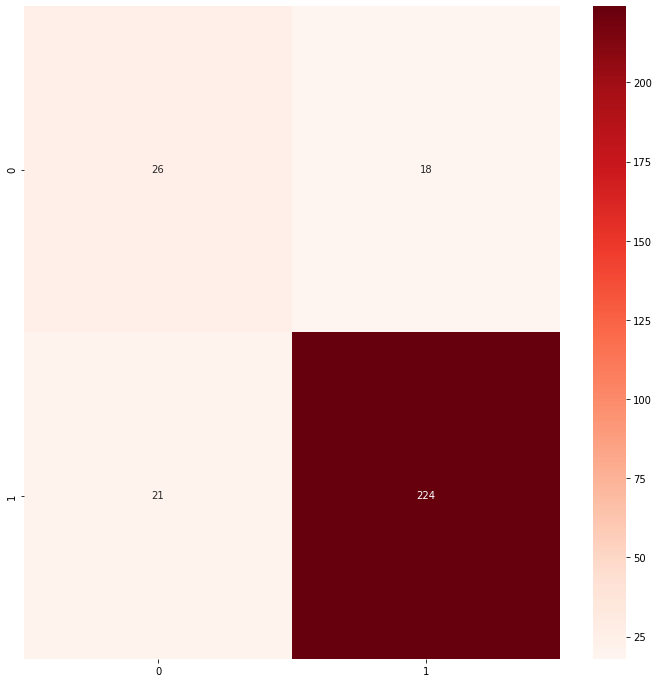

In [ ]:
#Confusion Plot
y_pred = lr_cv_1.predict(X_test)
fixConfusion(y_test, y_pred)

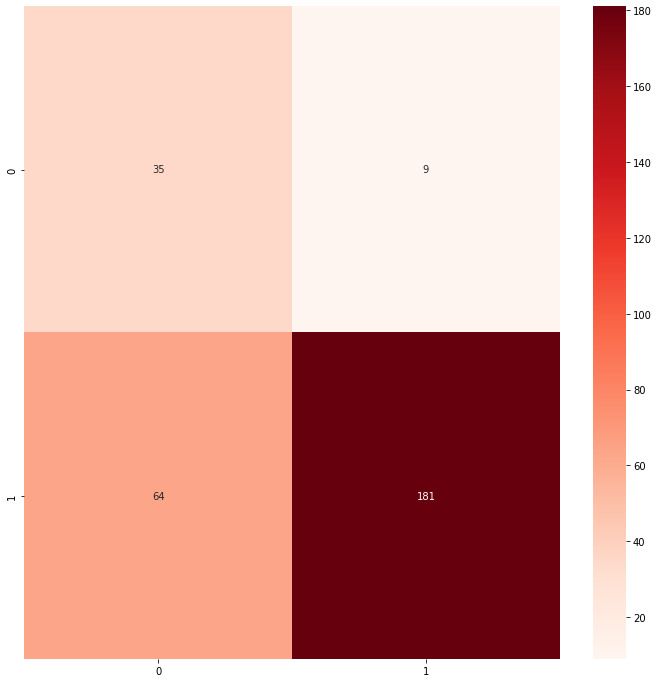

In [ ]:
y_pred = lr_cv_2.predict(X_test)
fixConfusion(y_test, y_pred)

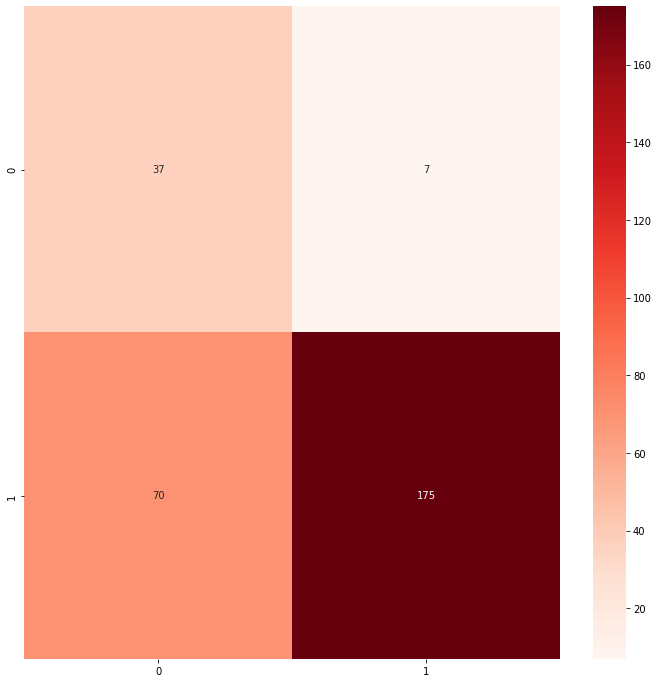

In [ ]:
y_pred = lr_cv_3.predict(X_test)
fixConfusion(y_test, y_pred)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(1, 100, num=100)]
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [int(x) for x in np.linspace(1, 40, num=40)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num=20)]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
rf_hyperparameters = dict(n_estimators=n_estimators,
                  max_depth=max_depth,
                  min_samples_split=min_samples_split,
                  min_samples_leaf=min_samples_leaf,
                  max_features=max_features,
                  criterion=criterion)
#Model
rf = RandomForestClassifier(random_state=42)
rf1 = RandomizedSearchCV(rf, rf_hyperparameters, cv=5, random_state=42, scoring='recall')
rf2 = RandomizedSearchCV(rf, rf_hyperparameters, cv=5, random_state=42, scoring='recall')
rf3 = RandomizedSearchCV(rf, rf_hyperparameters, cv=5, random_state=42, scoring='recall')

#Fit the model
rf1.fit(X_train,y_train) #Normal
rf2.fit(X_over,y_over) #Oversampling
rf3.fit(X_smote,y_smote) #SMOTE

#Evaluation
print("Normal:")
eval_classification(rf1)
print("\nOversampling:")
eval_classification_over(rf2)
print("\nSMOTE:")
eval_classification_smote(rf3)



Normal:
Precision (Train Set): 1.00
Precision (Test Set): 0.65
Recall (Train Set): 0.71
Recall (Test Set): 0.45
F1-Score (Train Set): 0.83
F1-Score (Test Set): 0.53
AUC (train-proba): 1.00
AUC (test-proba): 0.81

Oversampling:
Precision (Train Set): 0.99
Precision (Test Set): 0.48
Recall (Train Set): 0.99
Recall (Test Set): 0.66
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.55
AUC (train-proba): 1.00
AUC (test-proba): 0.82

SMOTE:
Precision (Train Set): 0.98
Precision (Test Set): 0.47
Recall (Train Set): 0.98
Recall (Test Set): 0.66
F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.55
AUC (train-proba): 1.00
AUC (test-proba): 0.79


n_estimators: 1; auc(train): 0.8367835172346451; auc (test) : 0.6374768089053805
n_estimators: 2; auc(train): 0.9473195976955374; auc (test) : 0.6857142857142857
n_estimators: 3; auc(train): 0.9693807803367417; auc (test) : 0.766604823747681
n_estimators: 4; auc(train): 0.9817261149162331; auc (test) : 0.7914656771799631
n_estimators: 5; auc(train): 0.9914628872738432; auc (test) : 0.7908163265306123
n_estimators: 6; auc(train): 0.9974542106658111; auc (test) : 0.7944805194805193
n_estimators: 7; auc(train): 0.9978796713490592; auc (test) : 0.8238404452690167
n_estimators: 8; auc(train): 0.9991281543376066; auc (test) : 0.815213358070501
n_estimators: 9; auc(train): 0.9997349589186324; auc (test) : 0.8133116883116884
n_estimators: 10; auc(train): 0.9998535299287179; auc (test) : 0.8239332096474954
n_estimators: 11; auc(train): 0.9999790757041025; auc (test) : 0.82708719851577
n_estimators: 12; auc(train): 0.9999860504694017; auc (test) : 0.8336734693877551
n_estimators: 13; auc(train):

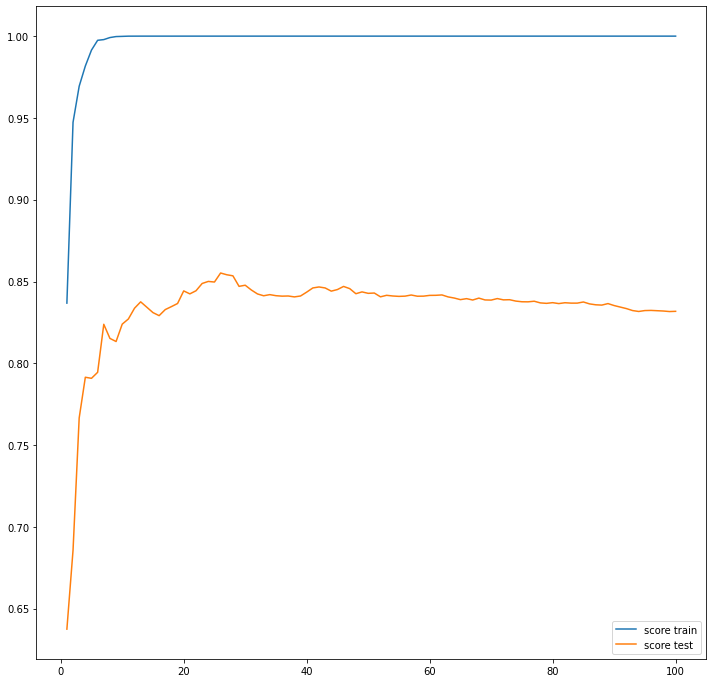

In [ ]:
n_val = [int(x) for x in np.linspace(1, 100, num=100)]
train_score = []
test_score = []

from sklearn.ensemble import RandomForestClassifier
for x in n_val:
  model = RandomForestClassifier(n_estimators=x, random_state=42)
  model.fit(X_train, y_train)

  y_pred_proba =  model.predict_proba(X_test)
  auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
  test_score.append(auc_test)

  y_pred_proba_train =  model.predict_proba(X_train)
  auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
  train_score.append(auc_train)

  print('n_estimators: '+str(x) + '; auc(train): ' + str(auc_train) + '; auc (test) : ' + str(auc_test))

from matplotlib import pyplot as plt
plt.plot(n_val, train_score, label='score train')
plt.plot(n_val, test_score, label='score test')
plt.legend()
plt.show()


Random Forest paling bagus menggunakan data SMOTE

**Precision Train: 0.75**

**Precision Test: 0.55**

Selisih train-test = -0.20

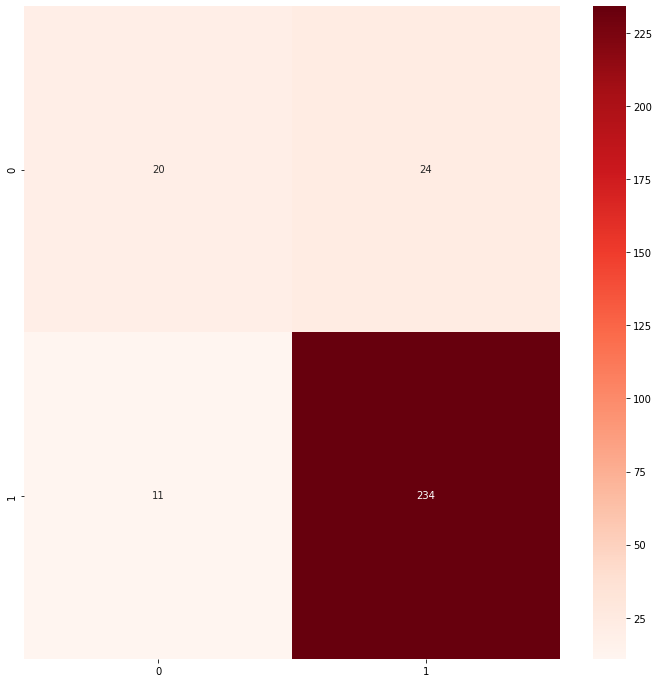

In [ ]:
#Confusion Plot
y_pred = rf1.predict(X_test)
fixConfusion(y_test, y_pred)

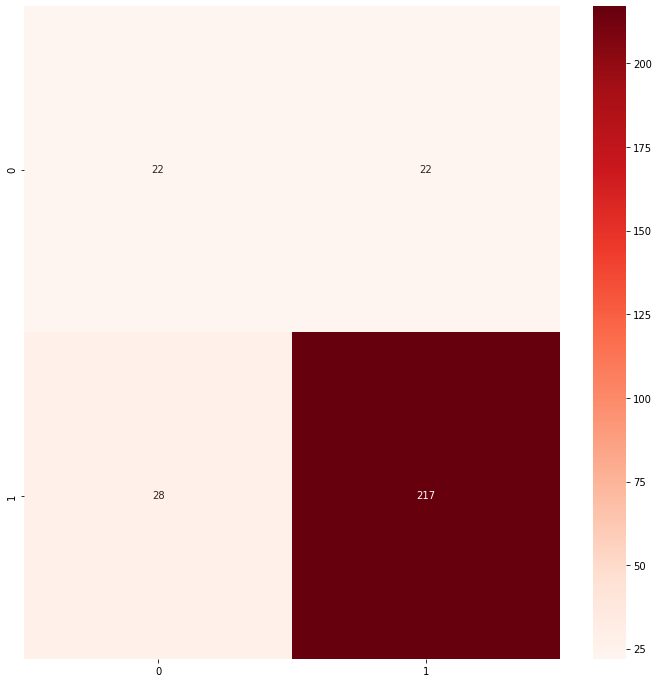

In [ ]:
#Confusion Plot
y_pred = rf2.predict(X_test)
fixConfusion(y_test, y_pred)

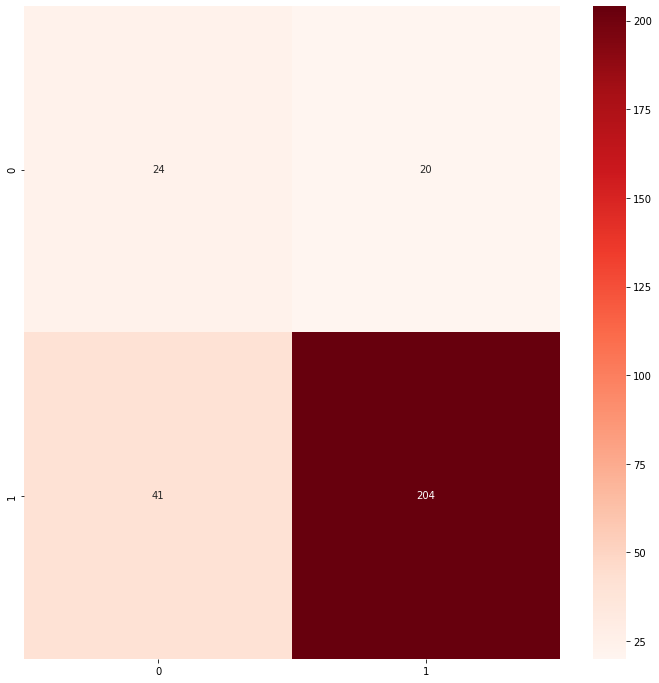

In [ ]:
#Confusion Plot
y_pred = rf3.predict(X_test)
fixConfusion(y_test, y_pred)

### XGBoost

In [ ]:
# n_estimators = [int(x) for x in np.linspace(100,1000,10)]
n_estimators = [int(x) for x in np.linspace(1, 100, num=100)]
max_depth = [int(x) for x in np.linspace(6,30,5)]
learning_rate = [0.01,0.02,0.03,0.04,0.05,1]
min_child_weight = list(range(1,10))
xg_hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
               min_child_weight=min_child_weight)

#Model
xgb_booster = xgboost.XGBClassifier(random_state=42)
xgb_b1 = RandomizedSearchCV(xgb_booster, xg_hyperparameters, cv=5, random_state=42, scoring='recall')
xgb_b2 = RandomizedSearchCV(xgb_booster, xg_hyperparameters, cv=5, random_state=42, scoring='recall')
xgb_b3 = RandomizedSearchCV(xgb_booster, xg_hyperparameters, cv=5, random_state=42, scoring='recall')

#Fit the model
xgb_b1.fit(X_train,y_train) #Normal
xgb_b2.fit(X_over,y_over) #Oversampling
xgb_b3.fit(X_smote,y_smote) #SMOTE

#Evaluation
print("Normal:")
eval_classification(xgb_b1)
print("\nOversampling:")
eval_classification_over(xgb_b2)
print("\nSMOTE:")
eval_classification_smote(xgb_b3)

Normal:
Precision (Train Set): 1.00
Precision (Test Set): 0.49
Recall (Train Set): 1.00
Recall (Test Set): 0.55
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.52
AUC (train-proba): 1.00
AUC (test-proba): 0.78

Oversampling:
Precision (Train Set): 1.00
Precision (Test Set): 0.43
Recall (Train Set): 1.00
Recall (Test Set): 0.64
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.51
AUC (train-proba): 1.00
AUC (test-proba): 0.80

SMOTE:
Precision (Train Set): 1.00
Precision (Test Set): 0.40
Recall (Train Set): 1.00
Recall (Test Set): 0.66
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.50
AUC (train-proba): 1.00
AUC (test-proba): 0.79


In [ ]:
xgb_b3.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.04,
 'max_delta_step': 0,
 'max_depth': 18,
 'min_child_weight': 5,
 'missing': None,
 'n_estimators': 96,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

*XGBoost paling bagus menggunakan data Oversampling*

**Precision Train: 0.91**

**Precision Test: 0.50**

Selisih train-test = -0.41

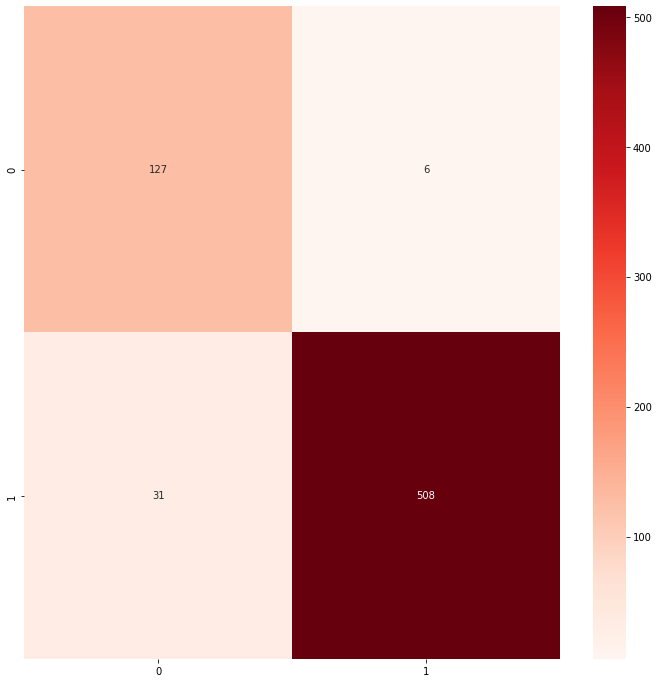

In [ ]:
#Confusion Plot
y_pred = xgb_b2.predict(X_train)
fixConfusion(y_train, y_pred)

In [ ]:
n_estimators = [int(x) for x in np.linspace(1, 100, num=100)]

### Komparasi

| Algorithm          | Recall (Train) | Recall (Test) |ROC-AUC (Train)|ROC-AUC (Test) |Sampling Type    |
|--------------------|--------------------|-------------------|---------|-----|----|
| **Logistic Regression**      | 0.39              | 0.43  |0.84|0.85   | Normal |                |
|       | **0.77**               | **0.78**   |**0.84** |**0.85**   | **Oversampling (Best Fit)** |
|       | 0.81               | 0.68    |0.87|0.81 | SMOTE |
| Random Forest      | 0.79              | 0.28  |0.99|0.81   | Normal |                |
|       | 0.99               | 0.45   |1.00 |0.82   | Oversampling |
|       | 0.98               | 0.55   |1.00|0.79 | SMOTE |
| XGBoost      | 0.60             | 0.40  |0.92|0.80   | Normal |                |
|       | 0.98               | 0.55   |0.99 |0.74   | Oversampling |
|       | 0.92               | 0.57    |0.98|0.77 | SMOTE |

Normal:
Precision (Train Set): 0.86
Precision (Test Set): 0.62
Recall (Train Set): 0.60
Recall (Test Set): 0.40
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.48
AUC (train-proba): 0.92
AUC (test-proba): 0.80

Oversampling:
Precision (Train Set): 0.93
Precision (Test Set): 0.40
Recall (Train Set): 0.98
Recall (Test Set): 0.55
F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.46
AUC (train-proba): 0.99
AUC (test-proba): 0.74

SMOTE:
Precision (Train Set): 0.92
Precision (Test Set): 0.49
Recall (Train Set): 0.92
Recall (Test Set): 0.57
F1-Score (Train Set): 0.92
F1-Score (Test Set): 0.52
AUC (train-proba): 0.98
AUC (test-proba): 0.77

Berdasarkan komparasi tersebut, algoritma modeling yang dipilih adalah **Logistic Regression tanpa resampling**

## Evaluasi dan Feature Importance

In [ ]:
#Coefisien
model = lr_cv_2
model.best_estimator_.coef_

feature = pd.DataFrame(model.best_estimator_.coef_, columns=list(X_over.columns)).reset_index()
feature_importance = pd.melt(feature, id_vars='index', value_vars=list(X_over.columns))
feature_importance.drop(columns=('index'), inplace=True)
feature_importance.sort_values('value', key=abs,ascending=False)

,variable,value
7,OverTime,1.615263
1,BusinessTravel,0.719347
5,JobSatisfaction,-0.457558
3,EnvironmentSatisfaction,-0.401724
8,StockOptionLevel,-0.367199
6,MonthlyIncome,-0.363688
2,DistanceFromHome,0.352276
12,MaritalStatus_Single,0.321205
10,YearsAtCompany,-0.309282
4,JobInvolvement,-0.299411


In [ ]:
colors = ['Positve' if c >= 0 else 'Negative' for c in feature_importance.value]
warna = ["#9B0000", "#000B49"]

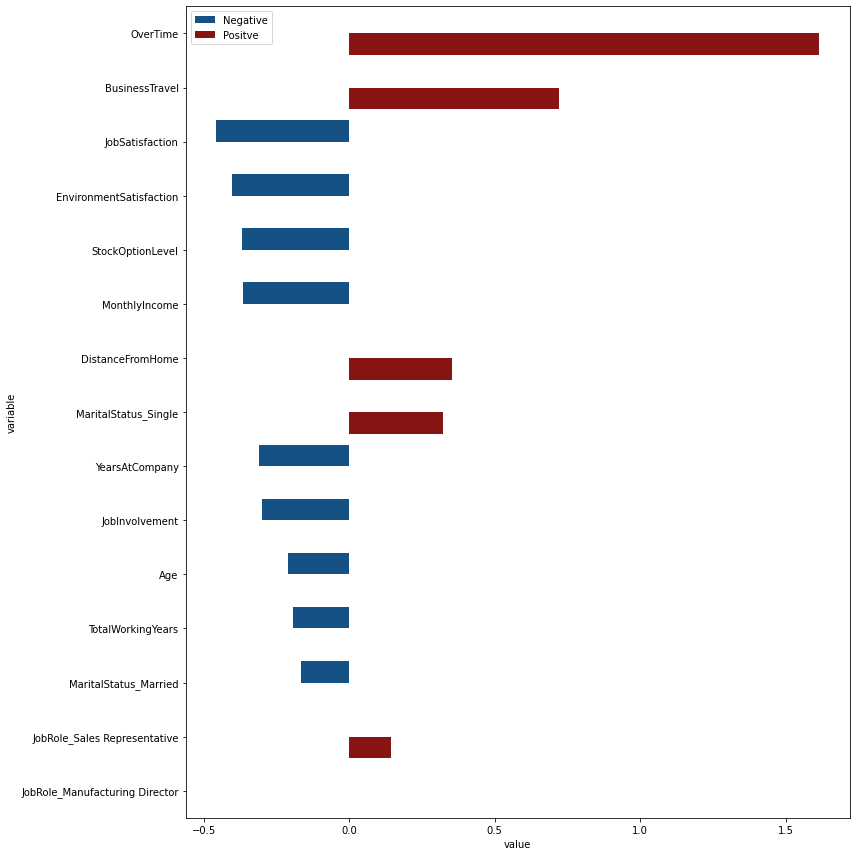

In [ ]:
sns.barplot(y="variable", x="value", data=feature_importance, orient='h',
             order=feature_importance.sort_values('value',key=abs,ascending = False).variable,
            hue=colors, palette=sns.color_palette(["#035397","#9B0000"]))
plt.tight_layout()
plt.show()

In [ ]:
# Assign ke variable model
model = lr_cv_2.best_estimator_

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 5.0 MB/s 


In [ ]:
import shap
explainer = shap.LinearExplainer(model, X_over, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
X_test_array = np.asarray(X_test)

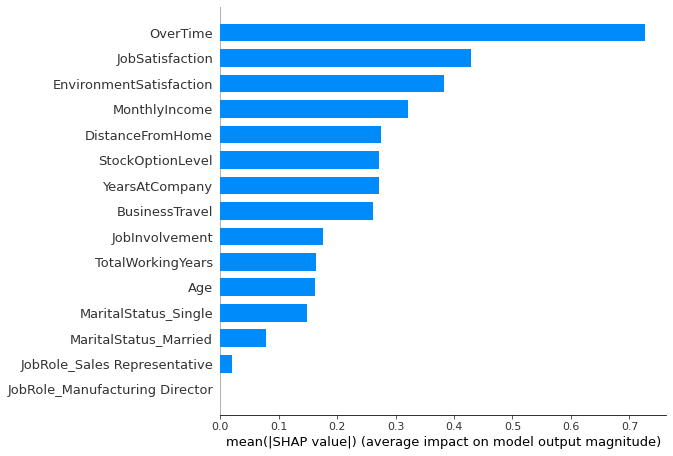

In [ ]:
#Feature Importance menggunakan SHAP Value
shap.summary_plot(shap_values, X_over.values, plot_type="bar", feature_names = X_over.columns)

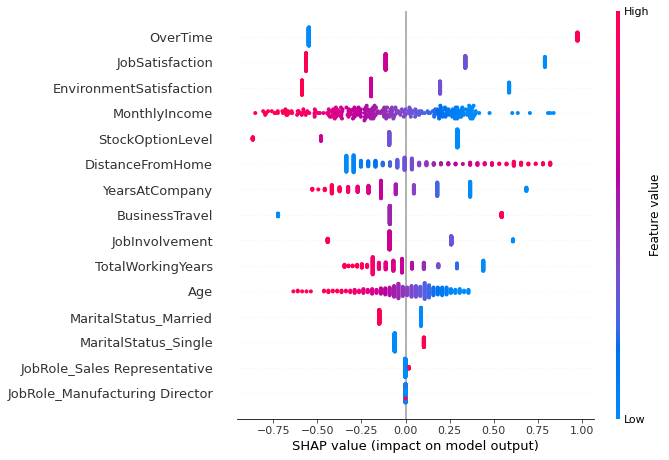

In [ ]:
#Feature Importance menggunakan SHAP Value (2)

shap.summary_plot(shap_values, X_test_array, feature_names = X_over.columns)

Terdapat beberapa perubahan dalam stage preprocessing untuk meningkatkan hasil model Machine Learning.

- Tidak menghapus outliers.
- Merubah semua fitur categorical selain Attrition menggunakan one hot encoding.
- Hanya menghapus fitur yang redundan, tidak menghapus fitur yang berkorelasi rendah ke variabel target.
- Merubah test sample menjadi 0.3.

Pengamatan:

- Overtime menjadi faktor utama yang berpengaruh kepada Attrition pegawai. Yang menarik justru pegawai yang tidak mendapatkan Overtime cenderung Attrit. Hal ini kemungkinan berkaitan dengan Job Satisfaction dan Job Involvement, dimana pegawai yang puas dengan pekerjaannya merasa 'berguna' bagi perusahaan melalui jam kerja tambahan (Overtime) sehingga pegawai tersebut memiliki kemungkinan bertahan lebih tinggi di perusahaan.

- Faktor gaji merupakan faktor kedua paling penting dalam model ini, dan ini merupakan hal yang umum.

- Pegawai yang memiliki kategori single, berumur muda, dan merupakan lulusan S1 lebih berkemungkinan Attrition dibandingkan pegawai yang sudah berumur lebih tua dan status hubungannya pernah menikah.

- Departement yang Attritionnya tinggi adalah Sales, sedangkan Job Role yang Attritionnya tinggi adalah Laboratory Technician.

- Fitur-fitur dalam visualisasi tersebut memiliki tingkat kepentingan yang berurutan secara vertikal ascending.

Beberapa Business Insights:

- Dalam merekrut karyawan baru yang masih muda dan berstatus single, perlu diberikan perhatian khusus terkait gaji, Working Environment dan ekspetasi Travelling yang mungkin terjadi. Karena Attrition banyak terjadi pada karyawan muda dan berstatus single, serta faktor gaji, kepuasan lingkungan kerja dan perjalanan kerja merupakan faktor yang berpengaruh kepada tingkat Attrition.

- Distance From Home merupakan faktor penting dalam Attrition pegawai. Mungkin bisa diberikan kost living / home living sponsorship di tempat yang dekat dengan kantor perusahaan, sehingga bisa meminimalisasi jarak yang ditempuh oleh pegawai ke perusahaan dan meningkatkan kepuasan pegawai terhadap perusahaan.

-Year since last promotion dan years at company merupakan salah satu faktor penting dalam attrition. mungkin perusahaan dapat memberikan promosi jabatan atau rotasi job role kepada karyawannya terutama karyawan yang telah lama menjabat dan sudah lama bekerja dan berpengalaman di bidangnya sehingga dapat meningkatkan kenyamanan pegawai.

-

# SIMULASI

In [ ]:
# load data
df_base = pd.read_csv('Employee_Attrition.csv',sep=',')
df_base.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_base['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
# hitung presentase overtime pada karyawan yg resign
df_base[df_base['Attrition']=='Yes']['OverTime'].value_counts()

Yes    127
No     110
Name: OverTime, dtype: int64

In [ ]:
df_base[df_base['Attrition']=='Yes']['BusinessTravel'].value_counts()

Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: BusinessTravel, dtype: int64

In [ ]:
# ambil karyawan resign yang overtime
df_attr_over = df_base[(df_base['Attrition']=='Yes') & (df_base['OverTime']=='Yes')]
df_attr_bus = df_base[(df_base['Attrition']=='Yes') & (df_base['BusinessTravel']!='Non-Travel')]
df_attr_job = df_base[(df_base['Attrition']=='Yes') & (df_base['JobSatisfaction']<=2)]
df_attr_env = df_base[(df_base['Attrition']=='Yes') & (df_base['EnvironmentSatisfaction']<=2)]

# mengambil 50% dari data tersebut
sample_index = df_attr_over.sample(int(df_attr_over.shape[0] * 0.5), random_state=42).index.values
sample_index_bus = df_attr_bus.sample(int(df_attr_bus.shape[0] * 0.5), random_state=42).index.values
sample_index_job = df_attr_job.sample(int(df_attr_job.shape[0] * 0.5), random_state=42).index.values
sample_index_env = df_attr_env.sample(int(df_attr_env.shape[0] * 0.5), random_state=42).index.values
len(sample_index_bus)

112

In [ ]:
print(sample_index_job)
print(sample_index_env)

[ 683  913  122  731  689  952  480  236  216  709 1016  789  947 1290
   21  366  777 1068 1326 1237  591  259  540  940 1236  864  414 1112
 1077 1057  317  514  711  214  573  791  892  495 1060  140 1365  953
  669  589  336 1339  585 1438  182  706  946 1297  482  370 1205 1271]
[ 975   36  482  800  124  540  813  792  589  132 1236  453 1016 1442
  205    0  849  357 1271  689 1077 1396  136  422  797 1060 1375  271
  528 1354  932  182  414 1012  122  436  762  789  378  514   42  706
  780  480  440  192 1379  439  720   50  525  798 1257  366  236 1057
 1110]


In [ ]:
import random
random.sample(['aa','bb'],1)[0]

'aa'

In [ ]:
# INI SIMULASINYA

import random

df_simulator = df_base.copy()
df_simulator.loc[sample_index,'OverTime'] = 'No'
# df_simulator.loc[sample_index_bus,'BusinessTravel'] = df_simulator.apply(lambda x: random.sample(['Non-Travel','Travel_Rarely'],2))
# df_simulator.loc[sample_index_bus,'BusinessTravel'] = 'Non-Travel'
df_simulator.loc[sample_index_job,'JobSatisfaction'] = 4
df_simulator.loc[sample_index_env,'EnvironmentSatisfaction'] = 4
df_simulator[df_simulator['Attrition']=='Yes']['JobSatisfaction'].value_counts()


4    108
3     73
1     34
2     22
Name: JobSatisfaction, dtype: int64

In [ ]:
kolom_used = ['Age','BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction',
 'JobInvolvement' ,'JobSatisfaction', 'MonthlyIncome' ,'OverTime',
 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
 'MaritalStatus_Married', 'MaritalStatus_Single',
 'JobRole_Manufacturing Director' ,'JobRole_Sales Representative']


# Label encoding
sim_label_encoding = {"Attrition": {'No':0, "Yes": 1},
                  "OverTime":{'No':0, "Yes": 1},
                  "Gender":{'Male':0, "Female":1},
                  "BusinessTravel":{"Non-Travel":0,"Travel_Rarely":1,"Travel_Frequently":2}
                  }

df_simulator[['Attrition', 'OverTime',"Gender","BusinessTravel"]]=df_simulator[['Attrition', 'OverTime',"Gender","BusinessTravel"]].replace(sim_label_encoding)



#One Hot Encoding

for i in ['MaritalStatus', 'EducationField', 'JobRole','Department']:
    sim_onehots = pd.get_dummies(df_simulator[i], prefix=i)
    df_simulator = df_simulator.join(sim_onehots)
    
df_simulator = df_simulator.drop(columns=['MaritalStatus', 'Department', 'EducationField', 'JobRole'], axis =1)
df_simulator.head()

df_ready = df_simulator[df_simulator['Attrition'] == 1]
df_ready = df_ready[kolom_used]


standard = ['Age', 'DistanceFromHome',
           'TotalWorkingYears', 
            'MonthlyIncome', 'YearsAtCompany']
from sklearn.preprocessing import StandardScaler
df_ready[standard] = StandardScaler().fit_transform(df_ready[standard].values.reshape(len(df_ready),5))


In [ ]:
df_simulator[df_simulator['Attrition'] == 1].shape

(237, 52)

In [ ]:
df_hasil = pd.DataFrame(lr_cv_2.predict(df_ready))
df_hasil.value_counts()

0    156
1     81
dtype: int64

## Git

[Link Git untuk project Employee Attrition oleh grup e-numpy](https://github.com/ilhamtaf/e-numphy)